### Objective

Read and understand the Data Schema of the github archive

### Load Packages

In [144]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

# setup credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = (
    os.path.abspath("../credentials/github-bigquery.json"))

In [54]:
%load_ext google.cloud.bigquery

### Show Schema

Github's activity Schema has changed since 2015.

* Activity archives are available starting 2/12/2011.
* Activity archives for dates between 2/12/2011-12/31/2014 was recorded from the (now deprecated) Timeline API.
* Activity archives for dates starting 1/1/2015 is recorded from the Events API.

#### Schema on Timeline API

In [33]:
client = bigquery.Client()
query = (client.query(
    '''
    SELECT * 
    FROM githubarchive.day.20120101
    WHERE RAND() < 1000 / (SELECT COUNT(*) FROM githubarchive.day.20120101)
    '''))
result = query.result() # get query result

for field in result.schema:
    fname = field.name
    ftype = field.field_type
    
    print(f"{fname}: {ftype}")
    if ftype == 'RECORD':
        for sub_f in field.fields:
            sub_fname = sub_f.name
            sub_ftype = sub_f.field_type
            print(f"\t - {sub_fname}: {sub_ftype}")

type: STRING
public: BOOLEAN
payload: STRING
repo: RECORD
	 - id: INTEGER
	 - name: STRING
	 - url: STRING
actor: RECORD
	 - id: INTEGER
	 - login: STRING
	 - gravatar_id: STRING
	 - avatar_url: STRING
	 - url: STRING
org: RECORD
	 - id: INTEGER
	 - login: STRING
	 - gravatar_id: STRING
	 - avatar_url: STRING
	 - url: STRING
created_at: TIMESTAMP
id: STRING
other: STRING


In [34]:
before_df = query.to_dataframe() 
before_df.head()

,type,public,payload,repo,actor,org,created_at,id,other
0,GistEvent,True,"{""gist"":{""created_at"":""2012-01-01T16:38:03Z"",""...","{'id': None, 'name': '/', 'url': 'https://api....","{'id': None, 'login': None, 'gravatar_id': Non...",None,2012-01-01 16:38:04+00:00,1508551943,None
1,GistEvent,True,"{""gist"":{""created_at"":""2012-01-01T03:02:27Z"",""...","{'id': None, 'name': '/', 'url': 'https://api....","{'id': None, 'login': None, 'gravatar_id': Non...",None,2012-01-01 03:02:28+00:00,1508519426,None
2,PushEvent,True,"{""ref"":""refs/heads/master"",""push_id"":55779768,...","{'id': 1795842, 'name': 'ali/Euler', 'url': 'h...","{'id': 515861, 'login': 'ali', 'gravatar_id': ...",None,2012-01-01 18:18:38+00:00,1508557785,None
3,FollowEvent,True,"{""target"":{""created_at"":""2008-04-03T18:24:17Z""...","{'id': None, 'name': '/', 'url': 'https://api....","{'id': 344338, 'login': 'ery', 'gravatar_id': ...",None,2012-01-01 12:31:00+00:00,1508540739,None
4,PushEvent,True,"{""ref"":""refs/heads/ldo"",""push_id"":55760708,""co...","{'id': 3025961, 'name': 'ldo/ShaderTools', 'ur...","{'id': 37975, 'login': 'ldo', 'gravatar_id': '...",None,2012-01-01 03:04:26+00:00,1508519494,None


#### Schema on Events API

In [30]:
client = bigquery.Client()
query = (client.query(
    '''
    SELECT * 
    FROM githubarchive.day.20160101
    WHERE RAND() < 1000 / (SELECT COUNT(*) FROM githubarchive.day.20160101)
    '''))
result = query.result() # get query result

for field in result.schema:
    fname = field.name
    ftype = field.field_type
    
    print(f"{fname}: {ftype}")
    if ftype == 'RECORD':
        for sub_f in field.fields:
            sub_fname = sub_f.name
            sub_ftype = sub_f.field_type
            print(f"\t - {sub_fname}: {sub_ftype}")

type: STRING
public: BOOLEAN
payload: STRING
repo: RECORD
	 - id: INTEGER
	 - name: STRING
	 - url: STRING
actor: RECORD
	 - id: INTEGER
	 - login: STRING
	 - gravatar_id: STRING
	 - avatar_url: STRING
	 - url: STRING
org: RECORD
	 - id: INTEGER
	 - login: STRING
	 - gravatar_id: STRING
	 - avatar_url: STRING
	 - url: STRING
created_at: TIMESTAMP
id: STRING
other: STRING


In [31]:
after_df = query.to_dataframe() 
after_df.head()

,type,public,payload,repo,actor,org,created_at,id,other
0,PushEvent,True,"{""push_id"":920058756,""size"":1,""distinct_size"":...","{'id': 41537695, 'name': 'vamen/ksit', 'url': ...","{'id': 12099000, 'login': 'vamen', 'gravatar_i...",None,2016-01-01 19:57:17+00:00,3487334586,None
1,PushEvent,True,"{""push_id"":920125576,""size"":9,""distinct_size"":...","{'id': 1164088, 'name': 'norton/meck', 'url': ...","{'id': 72710, 'login': 'norton', 'gravatar_id'...",None,2016-01-01 23:34:11+00:00,3487487228,None
2,PushEvent,True,"{""push_id"":920061697,""size"":1,""distinct_size"":...","{'id': 19862061, 'name': 'topepo/caret', 'url'...","{'id': 5731043, 'login': 'topepo', 'gravatar_i...",None,2016-01-01 20:06:07+00:00,3487341148,None
3,PushEvent,True,"{""push_id"":919978686,""size"":3,""distinct_size"":...","{'id': 39218504, 'name': 'Krast76/common', 'ur...","{'id': 4219270, 'login': 'Krast76', 'gravatar_...",None,2016-01-01 15:25:21+00:00,3487149030,None
4,CreateEvent,True,"{""ref"":""master"",""ref_type"":""branch"",""master_br...","{'id': 48877890, 'name': 'jdeneux/budget', 'ur...","{'id': 8156171, 'login': 'jdeneux', 'gravatar_...",None,2016-01-01 12:46:26+00:00,3487056451,None




**Issues to point out**

* The two schemas(Timeline API & Events API) are the same, but the values ​​of payload and type are different.


In [35]:
# type on timeline API schema
before_df.type.value_counts()

PushEvent             417
CreateEvent           292
WatchEvent             90
IssueCommentEvent      45
IssuesEvent            31
ForkEvent              22
GollumEvent            19
GistEvent              17
FollowEvent            16
PullRequestEvent       13
CommitCommentEvent     11
DownloadEvent           6
DeleteEvent             5
MemberEvent             4
ForkApplyEvent          2
Name: type, dtype: int64

In [36]:
# type on Events API schema
after_df.type.value_counts()

PushEvent                        587
CreateEvent                      121
WatchEvent                       103
IssueCommentEvent                 56
IssuesEvent                       41
PullRequestEvent                  38
ForkEvent                         26
DeleteEvent                       15
GollumEvent                        8
ReleaseEvent                       6
MemberEvent                        5
PullRequestReviewCommentEvent      4
PublicEvent                        2
CommitCommentEvent                 2
Name: type, dtype: int64

In [44]:
removed_events = (
    set(before_df.type.unique()) - set(after_df.type.unique()))
print(f"removed events : {removed_events}")

added_events = (
    set(after_df.type.unique()) - set(before_df.type.unique()))
print(f"added events : {added_events}")

removed events : {'GistEvent', 'FollowEvent', 'DownloadEvent', 'ForkApplyEvent'}
added events : {'PullRequestReviewCommentEvent', 'ReleaseEvent', 'PublicEvent'}


---

## 1. Explore `type` column

In [67]:
%%bigquery type_counts

SELECT type, count(type) as count, MIN(payload) as payload
FROM githubarchive.month.201501
GROUP BY type
ORDER BY count DESC

In [68]:
type_counts

,type,count,payload
0,PushEvent,7225701,"{""push_id"":536740396,""size"":1,""distinct_size"":..."
1,CreateEvent,1692562,"{""ref"":""!@#$%"",""ref_type"":""branch"",""master_bra..."
2,WatchEvent,1356759,"{""action"":""started""}"
3,IssueCommentEvent,1351054,"{""action"":""created"",""issue"":{""url"":""https://ap..."
4,IssuesEvent,710947,"{""action"":""closed"",""issue"":{""url"":""https://api..."
5,PullRequestEvent,696020,"{""action"":""closed"",""number"":1,""pull_request"":{..."
6,ForkEvent,502606,"{""forkee"":{""id"":28677549,""name"":""macvim"",""full..."
7,DeleteEvent,263197,"{""ref"":""!NoTaint"",""ref_type"":""branch"",""pusher_..."
8,PullRequestReviewCommentEvent,217630,"{""action"":""created"",""comment"":{""url"":""https://..."
9,GollumEvent,154457,"{""pages"":[{""page_name"":"" MySQL"",""title"":""MySQ..."


A total of 14 events occurred in a month, and each event has the following meanings according to the Github site.

* Reference : [github developer : Webhook event payloads](https://developer.github.com/webhooks/event-payloads/#push)


| Event Name      | Event Description    |
|:---- |:--- |
|PushEvent| One or more commits are pushed to a repository branch or tag. |
|CreateEvent| A Git branch or tag is created. For more information, see the "Git data" REST API. |
|WatchEvent| When someone stars a repository |
|IssueCommentEvent| Activity related to an issue comment |
|IssuesEvent| Activity related to an issue |
|PullRequestEvent| Activity related to pull requests. |
|ForkEvent| A user forks a repository |
|DeleteEvent| A Git branch or tag is deleted |
|PullRequestReviewCommentEvent| Activity related to pull request review comments in the pull request's unified diff |
|GollumEvent| A wiki page is created or updated |
|CommitCommentEvent| A commit comment is created |
|MemberEvent| Activity related to repository collaborators |
|ReleaseEvent| Activity related to a release |
|PublicEvent|  |
 

## 2. Explore `payload` column


Payload has a different structure for each type.

In [104]:
import json

for idx, row in type_counts.iterrows():
    payload = list(json.loads(row.payload).keys())
    print(f"{row.type} : {payload}")
    print("\n--------------------------\n")

PushEvent : ['push_id', 'size', 'distinct_size', 'ref', 'head', 'before', 'commits']

--------------------------

CreateEvent : ['ref', 'ref_type', 'master_branch', 'description', 'pusher_type']

--------------------------

WatchEvent : ['action']

--------------------------

IssueCommentEvent : ['action', 'issue', 'comment']

--------------------------

IssuesEvent : ['action', 'issue']

--------------------------

PullRequestEvent : ['action', 'number', 'pull_request']

--------------------------

ForkEvent : ['forkee']

--------------------------

DeleteEvent : ['ref', 'ref_type', 'pusher_type']

--------------------------

PullRequestReviewCommentEvent : ['action', 'comment', 'pull_request']

--------------------------

GollumEvent : ['pages']

--------------------------

CommitCommentEvent : ['comment']

--------------------------

MemberEvent : ['member', 'action']

--------------------------

ReleaseEvent : ['action', 'release']

--------------------------

PublicEvent : []

---

### Explore `repo` Column

####  Top 10 Repository with the most stars

In [92]:
%%bigquery repo_counts

SELECT 
    repo.id as repo_id, 
    MIN(repo.name) as repo_name,  
    MIN(repo.url) as repo_url,
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'WatchEvent'
GROUP BY repo.id
ORDER BY count DESC
LIMIT 10

In [93]:
repo_counts.repo_name.loc[:10]

0                          alex/what-happens-when
1                     prakhar1989/awesome-courses
2                          yaronn/blessed-contrib
3                    tiimgreen/github-cheat-sheet
4    h5bp/Front-end-Developer-Interview-Questions
5                         daniel-lundin/snabbt.js
6                                  gorhill/uBlock
7                           libreboard/libreboard
8                             sophron/wifiphisher
9                                   IanLunn/Hover
Name: repo_name, dtype: object

#### Top 10 Repository with the most commit & Push

In [95]:
%%bigquery repo_counts

SELECT 
    repo.id as repo_id, 
    MIN(repo.name) as repo_name,  
    MIN(repo.url) as repo_url,
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'PushEvent'
GROUP BY repo.id
ORDER BY count DESC
LIMIT 10

In [96]:
repo_counts

,repo_id,repo_name,repo_url,count
0,21481110,KenanSulayman/heartbeat,https://api.github.com/repos/KenanSulayman/hea...,58277
1,15100395,greatfire/wiki,https://api.github.com/repos/greatfire/wiki,24793
2,6058234,sakai-mirror/melete,https://api.github.com/repos/sakai-mirror/melete,22707
3,25173910,qdm/qdm.github.io,https://api.github.com/repos/qdm/qdm.github.io,21369
4,26289381,efa2000/efa2000.github.io,https://api.github.com/repos/efa2000/efa2000.g...,14187
5,18126008,greatfire/z,https://api.github.com/repos/greatfire/z,11337
6,22027821,wmst/wmidbot,https://api.github.com/repos/wmst/wmidbot,8178
7,7588969,xenim/livestatus-publicpage,https://api.github.com/repos/xenim/livestatus-...,6001
8,9457897,SeleniumHQ/irc-logs,https://api.github.com/repos/SeleniumHQ/irc-logs,5486
9,26505810,cn-nytimes/mirrors,https://api.github.com/repos/cn-nytimes/mirrors,5429


#### Top 10 Repository with the most active issues

In [99]:
%%bigquery repo_counts

SELECT 
    repo.id as repo_id, 
    MIN(repo.name) as repo_name,  
    MIN(repo.url) as repo_url,
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'IssueEvent' or type = "IssueCommentEvent"
GROUP BY repo.id
ORDER BY count DESC
LIMIT 10

In [100]:
repo_counts

,repo_id,repo_name,repo_url,count
0,17165658,apache/spark,https://api.github.com/repos/apache/spark,7529
1,5550552,owncloud/core,https://api.github.com/repos/owncloud/core,7381
2,724712,rust-lang/rust,https://api.github.com/repos/rust-lang/rust,7261
3,7691631,docker/docker,https://api.github.com/repos/docker/docker,5759
4,3234987,tgstation/-tg-station,https://api.github.com/repos/tgstation/-tg-sta...,4963
5,20580498,GoogleCloudPlatform/kubernetes,https://api.github.com/repos/GoogleCloudPlatfo...,4616
6,28710753,sphinx-doc/sphinx,https://api.github.com/repos/sphinx-doc/sphinx,4480
7,10969551,cms-sw/cmssw,https://api.github.com/repos/cms-sw/cmssw,4229
8,1644196,JuliaLang/julia,https://api.github.com/repos/JuliaLang/julia,3480
9,27193779,iojs/io.js,https://api.github.com/repos/iojs/io.js,3125


#### Top 10 Repository with the most forks

In [105]:
%%bigquery repo_counts

SELECT 
    repo.id as repo_id, 
    MIN(repo.name) as repo_name,  
    MIN(repo.url) as repo_url,
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'ForkEvent'
GROUP BY repo.id
ORDER BY count DESC
LIMIT 10

In [106]:
repo_counts

,repo_id,repo_name,repo_url,count
0,14204342,jtleek/datasharing,https://api.github.com/repos/jtleek/datasharing,11322
1,15917132,rdpeng/ProgrammingAssignment2,https://api.github.com/repos/rdpeng/Programmin...,6046
2,1300192,octocat/Spoon-Knife,https://api.github.com/repos/octocat/Spoon-Knife,4401
3,16659106,rdpeng/ExData_Plotting1,https://api.github.com/repos/rdpeng/ExData_Plo...,2164
4,16709733,rdpeng/RepData_PeerAssessment1,https://api.github.com/repos/rdpeng/RepData_Pe...,1247
5,24366295,udacity/frontend-nanodegree-resume,https://api.github.com/repos/udacity/frontend-...,1237
6,16599031,barryclark/jekyll-now,https://api.github.com/repos/barryclark/jekyll...,1066
7,2126244,twbs/bootstrap,https://api.github.com/repos/twbs/bootstrap,1055
8,460078,angular/angular.js,https://api.github.com/repos/angular/angular.js,908
9,24659289,LarryMad/recipes,https://api.github.com/repos/LarryMad/recipes,839


### Explore `actor` Column

#### How often do people push?

In [107]:
%%bigquery actor_counts

SELECT 
    actor.id as actor_id, 
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'PushEvent'
GROUP BY actor_id
ORDER BY count DESC

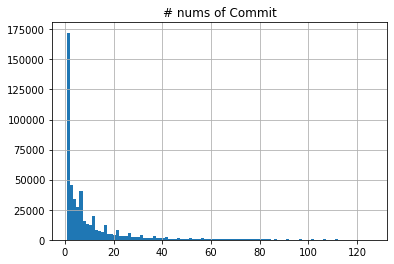

In [148]:
max_count = actor_counts['count'].quantile(0.99)
min_count = actor_counts['count'].quantile(0.01)

actor_counts['count'][
    (actor_counts['count']<=max_count) & 
    (actor_counts['count']>=min_count)
].hist(bins=100)
plt.title("# nums of Commit")
plt.show()

#### How often do people issue and comment"

In [150]:
%%bigquery actor_counts

SELECT 
    actor.id as actor_id, 
    COUNT(repo.id) as count
FROM githubarchive.month.201501
WHERE type = 'IssuesEvent' or type = 'IssueCommentEvent'
GROUP BY actor_id
ORDER BY count DESC

In [163]:
%%bigquery

SELECT
    COUNT(created_at) as c
FROM 
    githubarchive.year.2015

,c
0,212174067


In [164]:
212174067

212174067

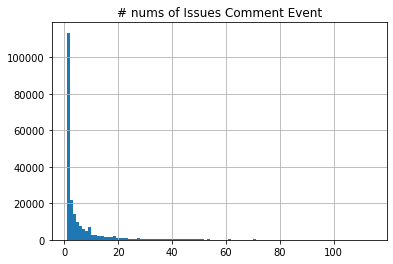

In [151]:
max_count = actor_counts['count'].quantile(0.99)
min_count = actor_counts['count'].quantile(0.01)

actor_counts['count'][
    (actor_counts['count']<=max_count) & 
    (actor_counts['count']>=min_count)
].hist(bins=100)
plt.title("# nums of Issues Comment Event")
plt.show()

### Explore `created_at` Column

In [154]:
%%bigquery timeserial

SELECT 
    EXTRACT(DAY FROM created_at) AS day,
    COUNT(created_at) as count
FROM githubarchive.month.201501
WHERE type = 'IssuesEvent' or type = 'IssueCommentEvent'
GROUP BY day
ORDER BY day ASC

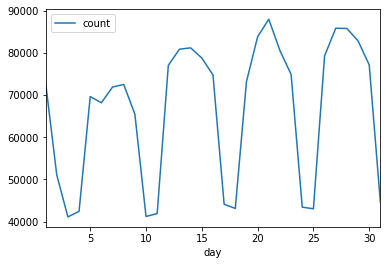

In [157]:
timeserial.plot('day','count')
plt.show()